<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- Grid Search로 Decision Tree 알고리즘 모델을 튜닝합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [4]:
# 상위 몇 개 행 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [5]:
# 기초통계량 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [6]:
# 제거 대상: id
del_cols = ['id']

# 변수 제거
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**2) x, y 분리**

In [7]:
# Target 설정
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

In [8]:
# 가변수화 대상: 'REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN]
dumm_cols =['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


**3) 정규화**

In [9]:
# 정규화 대상: INCOME, OVERAGE, LEFTOVER, HOUSE, HANDSET_PRICE, OVER_15MINS_CALLS_PER_MONTH, AVERAGE_CALL_DURATION
norm_cols = ['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']

# 정규화
x[norm_cols] = (x[norm_cols] - x[norm_cols].min()) / (x[norm_cols].max() - x[norm_cols].min())

# 확인
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,0.085343,0.005935,0.067416,0.192208,0.040312,0.000000,0.214286,0,1,0,0,0,1,0,0,0,0,1,0
1,1,0.115305,0.005935,0.146067,0.765398,0.148244,0.000000,0.357143,0,1,0,0,0,1,0,0,1,0,0,0
2,1,0.051909,0.688427,0.000000,0.182410,0.092328,0.551724,1.000000,0,1,0,0,0,0,0,1,0,0,0,1
3,0,0.714858,0.118694,0.370787,0.750868,0.845254,0.103448,0.071429,0,1,0,0,0,0,1,0,1,0,0,0
4,1,0.065783,0.623145,0.955056,0.087979,0.144343,0.724138,0.000000,0,0,0,1,0,1,0,0,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 모델 선언시 max_depth=5를 지정합니다.

In [ ]:
# 불러오기



In [ ]:
# 선언하기


In [ ]:
# 학습하기


In [ ]:
# 예측하기


In [ ]:
# 평가하기



# 5.성능 튜닝


- Grid Search로 튜닝을 진행합니다. 
- 다양한 파라미터 grid search시 시간이 많이 걸리므로 max_depth부터 찾아서 고정시키고 mean_samples_split, mean_samples_leaf... 이런 식으로 하나하니씩 튜닝하는 방법도 있다.

**1) 모델링 & 튜닝**

In [11]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 파라미터 선언
  # max_depth : range(1, 51)
params = {'max_depth':range(1,51)}

# 기본 모델 선언

model = GridSearchCV(DecisionTreeClassifier(random_state=2022),
                     params,
                     cv=5,
                     scoring='accuracy')

# Random Search 선언
  # cv=5
  # scoring='accuracy'





In [12]:
# 학습하기
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

**2) 결과 확인**

In [13]:
# mean_test_score 확인
print(model.cv_results_['mean_test_score'])

[0.61328571 0.65214286 0.68885714 0.69778571 0.69185714 0.69114286
 0.68678571 0.68628571 0.6745     0.67335714 0.66592857 0.66278571
 0.65507143 0.64521429 0.63964286 0.62985714 0.62128571 0.621
 0.61714286 0.61392857 0.61492857 0.60835714 0.61107143 0.60942857
 0.61085714 0.61221429 0.61       0.60835714 0.61228571 0.61185714
 0.60985714 0.61014286 0.61114286 0.60942857 0.60978571 0.60907143
 0.60978571 0.60985714 0.60964286 0.6095     0.6095     0.6095
 0.6095     0.6095     0.6095     0.6095     0.6095     0.6095
 0.6095     0.6095    ]


In [14]:
# 최적 파라미터
print(model.best_params_)

{'max_depth': 4}


In [15]:
# 최고 성능
print(model.best_score_)

0.6977857142857143


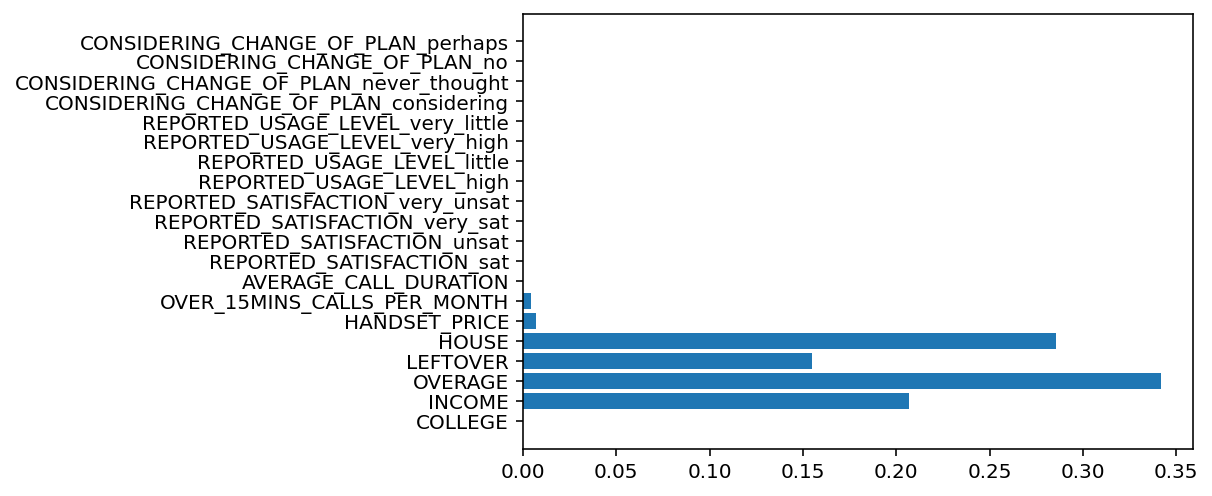

In [20]:
# 변수 중요도 
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

**3) 예측과 평가**

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수는 없겠지요?

In [24]:
# 예측하기
y_pred = model.predict(X_test)

In [28]:
# 평가하기
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1973 1103]
 [ 655 2269]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      3076
           1       0.67      0.78      0.72      2924

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



In [28]:
# 파라미터 선언
# max_depth : range(1, 51)
params = {'min_samples_split':range(2,51),
         'min_samples_leaf':range(1,51)}

# 기본 모델 선언

model = GridSearchCV(DecisionTreeClassifier(max_depth=4,random_state=2022),
                     params,
                     cv=5,
                     scoring='accuracy')

In [29]:
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=2022),
             param_grid={'min_samples_leaf': range(1, 51),
                         'min_samples_split': range(2, 51)},
             scoring='accuracy')

In [27]:
model.best_params_

{'min_samples_split': 2}